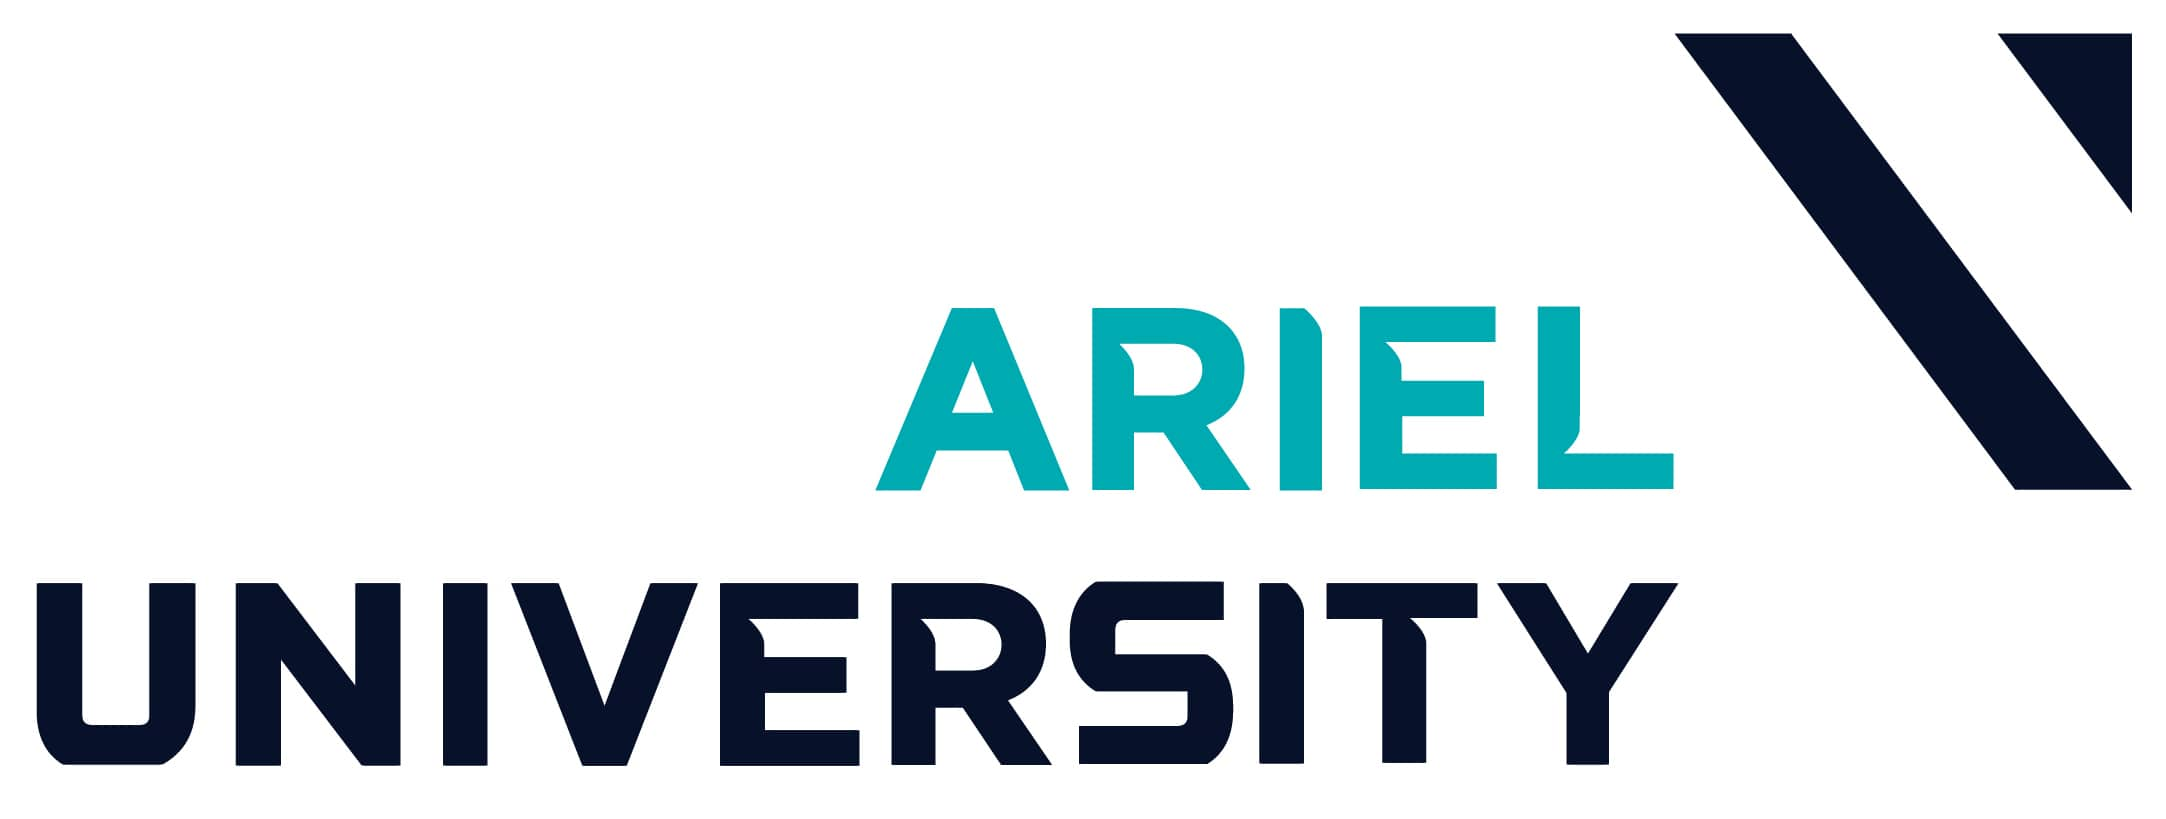

In [106]:
from IPython import display
display.Image("https://www.ariel.ac.il/sites/Navon-Venezia/img/Ariel_U_logo2.jpg")

#### Presented by:


* Leor Neuman
* 
* 

# Source: 
kaggle:"https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset"

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [133]:
url='https://raw.githubusercontent.com/hhneuman/Data-Analisys/main/Sleep_health_and_lifestyle_dataset.csv'
df=pd.read_csv('https://raw.githubusercontent.com/hhneuman/Data-Analisys/main/Sleep_health_and_lifestyle_dataset.csv')
sleep_df=df.copy()

In [134]:
sleep_df.info()
sleep_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


(374, 13)

In [135]:
sleep_df=sleep_df.rename(columns={"Person ID": "Person_ID",
                         "Sleep Duration": "Sleep_Duration",
                         'Quality of Sleep': 'Quality_of_Sleep',
                         'Physical Activity Level': 'Physical_Activity_Level',
                         'Stress Level': 'Stress_Level', 
                         'BMI Category': 'BMI_Category', 
                         'Blood Pressure': 'Blood_Pressure',
                         'Heart Rate': 'Heart_Rate',
                         'Daily Steps': 'Daily_Steps',
                         'Sleep Disorder': 'Sleep_Disorder'})

In [136]:
sleep_df

,Person_ID,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Blood_Pressure,Heart_Rate,Daily_Steps,Sleep_Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [137]:
sleep_df['BMI_Category']=sleep_df['BMI_Category'].replace('Normal Weight','Normal')

In [138]:
corr_df=sleep_df.copy()

In [139]:
corr_df['BMI_Category']=corr_df['BMI_Category'].replace(['Normal','Overweight','Obese'],[1,2,3])
corr_df['Sleep_Disorder']=corr_df['Sleep_Disorder'].replace(['None','Insomnia','Sleep Apnea'],[1,2,3])

In [140]:
#sleep_df
#for i in sleep_df['Heart_Rate']:
#    if i>80:
#        sleep_df=sleep_df.replace(i,'80+')
#    if i>75 and i<=80:
#        sleep_df=sleep_df.replace(i,'75-80')
#    if i>70 and i<=75:
#        sleep_df=sleep_df.replace(i,'70-75')
#    if i>65 and i<=70:
#        sleep_df=sleep_df.replace(i,'65-70')
#    if i<65:
#        sleep_df=sleep_df.replace(i,'Lower then 65')

In [141]:
#sleep_df['Heart_Rate']

In [142]:
grouped_df1 = sleep_df.groupby(['Occupation',
                                'Gender',
                                'Sleep_Disorder'])[['Quality_of_Sleep',
                                                    'Stress_Level',
                                                    'Age',
                                                    'Blood_Pressure',
                                                    'Physical_Activity_Level',
                                                    'Sleep_Duration',
                                                    'Heart_Rate',
                                                    'Daily_Steps',
                                                    'BMI_Category']].max()
grouped_df1.head(10)

Quality_of_Sleep  Stress_Level  Age  \
Occupation Gender Sleep_Disorder                                        
Accountant Female Insomnia                       8             7   52   
                  None                           9             6   40   
           Male   None                           8             6   32   
Doctor     Female None                           9             3   56   
           Male   Insomnia                       7             8   48   
                  None                           7             8   33   
                  Sleep Apnea                    9             8   49   
Engineer   Female Insomnia                       9             3   53   
                  None                           9             3   54   
           Male   Insomnia                       8             7   44   

                                 Blood_Pressure  Physical_Activity_Level  \
Occupation Gender Sleep_Disorder                                           
Accountant Female Insomnia               130/85                       60   
                  None                   119/77                       80   
           Male   None                   118/76                       50   
Doctor     Female None                   118/75                       90   
           Male   Insomnia               142/92                       65   
                  None                   125/80                       75   
                  Sleep Apnea            139/91                       85   
Engineer   Female Insomnia               125/80                       30   
                  None                   125/80                       30   
           Male   Insomnia               132/87                       90   

                                  Sleep_Duration  Heart_Rate  Daily_Steps  \
Occupation Gender Sleep_Disorder                                            
Accountant Female Insomnia                   7.2          72         7000   
                  None                       8.0          73         7500   
           Male   None                       7.2          68         7000   
Doctor     Female None                       8.2          65        10000   
           Male   Insomnia                   7.3          83         5000   
                  None                       7.9          75        10000   
                  Sleep Apnea                8.1          86         8000   
Engineer   Female Insomnia                   8.3          65         5000   
                  None                       8.5          65         5000   
           Male   Insomnia                   7.8          80         8000   

                                 BMI_Category  
Occupation Gender Sleep_Disorder               
Accountant Female Insomnia         Overweight  
                  None                 Normal  
           Male   None                 Normal  
Doctor     Female None                 Normal  
           Male   Insomnia              Obese  
                  None                 Normal  
                  Sleep Apnea           Obese  
Engineer   Female Insomnia             Normal  
                  None                 Normal  
           Male   Insomnia         Overweight

<AxesSubplot:>

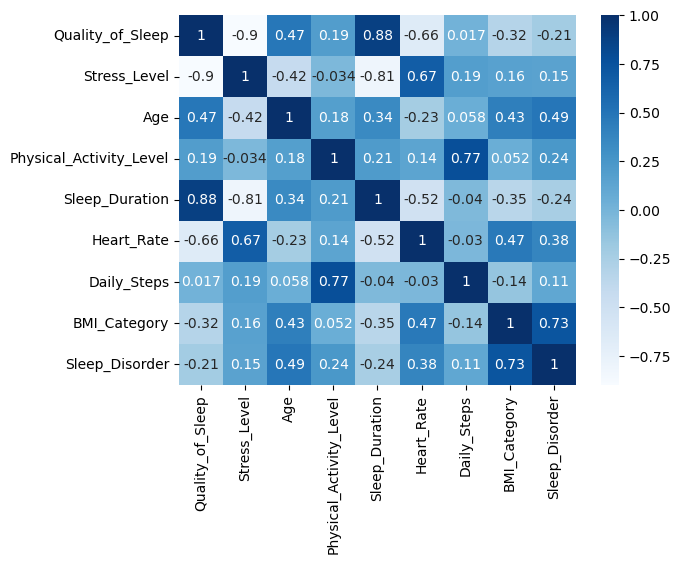

In [194]:
features=['Quality_of_Sleep','Stress_Level','Age','Blood_Pressure','Physical_Activity_Level','Sleep_Duration','Heart_Rate','Daily_Steps','BMI_Category','Sleep_Disorder']
correlation_matrix = corr_df[features].corr()
sns.heatmap(data=correlation_matrix,cmap='Blues', annot=True)

In [28]:
disorder_df=sleep_df['Sleep_Disorder']
disorder_df=disorder_df.value_counts().to_frame()
insomnia= disorder_df.loc[disorder_df.Sleep_Disorder == 'Insomnia'].value_counts()
non= disorder_df.loc[disorder_df.Sleep_Disorder == 'None'].value_counts()
anpea=disorder_df.loc[disorder_df.Sleep_Disorder == 'Sleep Anpea'].value_counts()
disorder_df=disorder_df.rename(columns={"":"value"})
disorder_df=disorder_df.rename(columns={'Sleep_Disorder':'Val','':'Disorder'})
disorder_df


,Val
None,219
Sleep Apnea,78
Insomnia,77


In [152]:
grouped_df2 = corr_df.groupby('Sleep_Disorder')[['Gender','Quality_of_Sleep','Stress_Level','Age','Blood_Pressure','Physical_Activity_Level','Sleep_Duration','Heart_Rate','Daily_Steps','BMI_Category']]

<AxesSubplot:ylabel='Sleep_Disorder-None'>

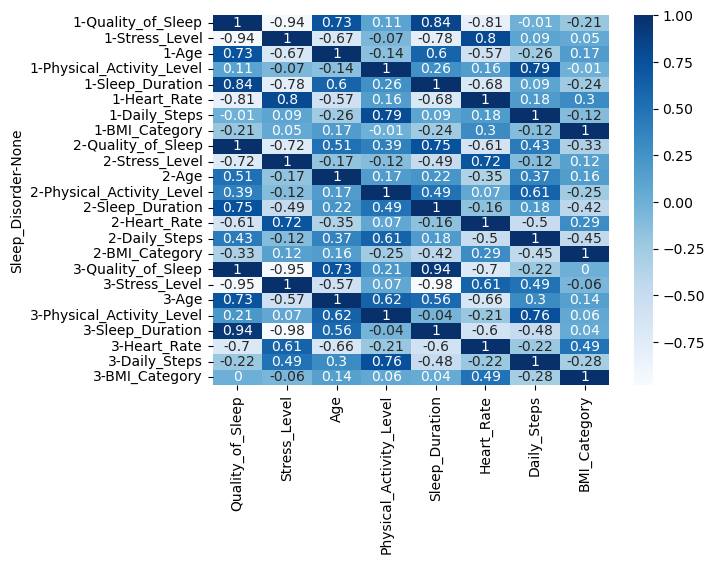

In [153]:
correlation_matrix2 = grouped_df2.corr().round(2)
sns.heatmap(data=correlation_matrix2,cmap='Blues', annot=True)

Ideas:
1.Stress-Sleep Quality
2.Sleep-BMI
3.Occ-Sleep Dur/Qua*
4.Occ+Stress-Sleep Dur/Qua
5.Disorder(Insomnia)+Stress-Sleep Qua
6.Age+Stress-Sleep Dur/Qua
7.Sleep Dur Compared to Physical Activiry and Sleep Quality*
8.Gender+Occ-Sleep Qua*
9.Occ+Sleep Dur-Sleep Qua
10.

<AxesSubplot:ylabel='Stress_Level-None'>

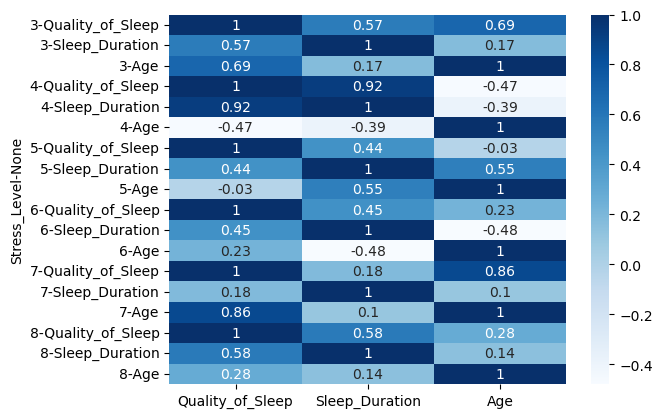

In [150]:
grouped_df3 = sleep_df.groupby(['Stress_Level'])[['Quality_of_Sleep','Sleep_Duration','Age']]
correlation_matrix2 = grouped_df3.corr().round(2)
sns.heatmap(data=correlation_matrix2,cmap='Blues', annot=True)

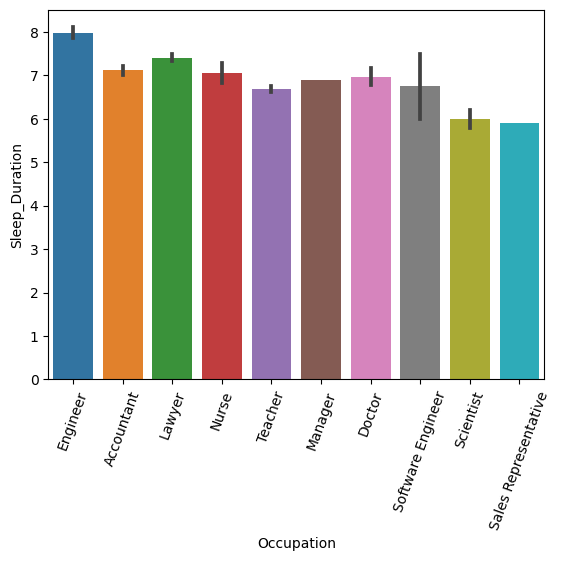

In [151]:
my_order1=['Engineer','Accountant','Lawyer','Nurse','Teacher','Manager','Doctor','Software Engineer','Scientist','Sales Representative']
sns.barplot(data = sleep_df, x='Occupation', y='Sleep_Duration',order=my_order1)
plt.xticks(rotation=70)
plt.show()

In [33]:
grouped_df5 = sleep_df.groupby(['Gender'])[['Quality_of_Sleep','Sleep_Duration']]


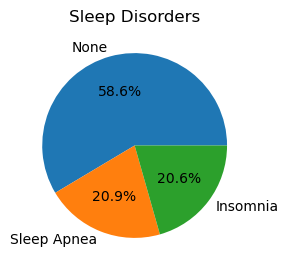

In [154]:
plt.figure(1, figsize=(3,3))
plt.title("Sleep Disorders")
sleep_df['Sleep_Disorder'].value_counts().plot.pie(autopct="%1.1f%%")
plt.ylabel("")
plt.show()

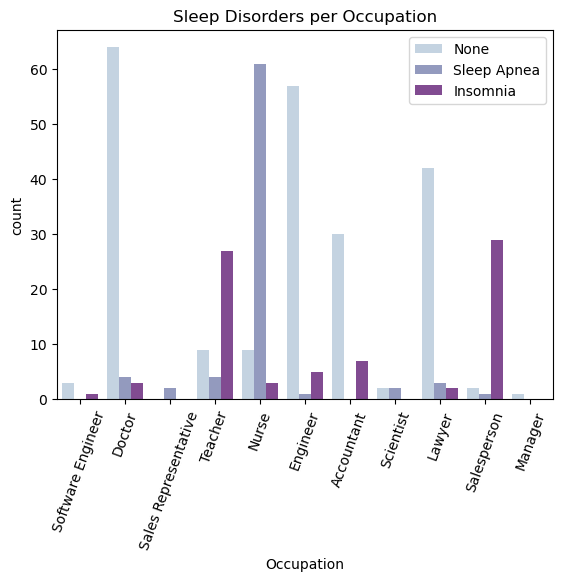

In [36]:
fig=sns.countplot(x="Occupation", data=sleep_df, hue = 'Sleep_Disorder', palette="BuPu")
plt.xticks(rotation=70)
fig.set_title("Sleep Disorders per Occupation")
plt.legend(title='', loc=('upper right')) 
plt.show()

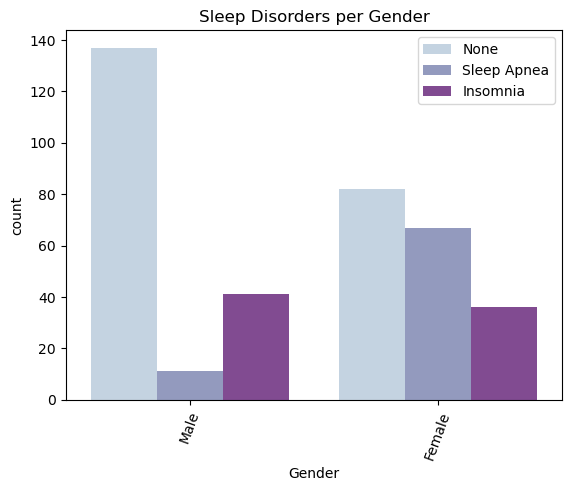

In [161]:
fig=sns.countplot(x="Gender", data=sleep_df, hue = 'Sleep_Disorder', palette="BuPu")
plt.xticks(rotation=70)
fig.set_title("Sleep Disorders per Gender")
plt.legend(title='', loc=('upper right')) 
plt.show()

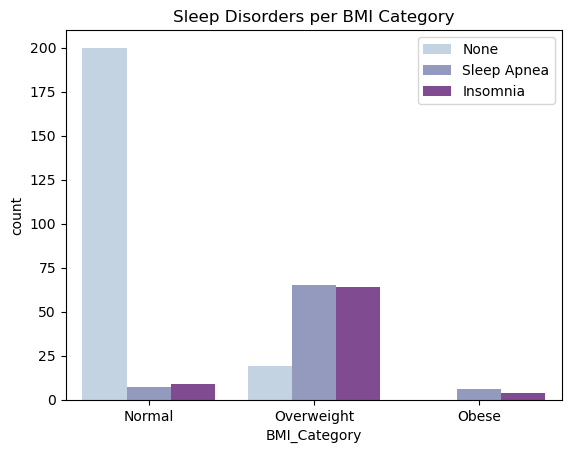

In [158]:
my_order2=['Normal','Overweight','Obese']
fig=sns.countplot(x="BMI_Category", data=sleep_df, hue = 'Sleep_Disorder', palette="BuPu",order=my_order2)
plt.xticks(rotation=0)
fig.set_title("Sleep Disorders per BMI Category")
plt.legend(title='', loc=('upper right')) 
plt.show()

# Conclusion number 1
#### According to the data we were presented, a person's BMI could increase the chance of a person having a sleeping disorder.
#### In our analisys over 70% of people who are over weight suffer from a sleeping disorder and 100% of people who suffer from obesity also suffer from a sleeping disorder

<AxesSubplot:xlabel='Stress_Level', ylabel='Quality_of_Sleep'>

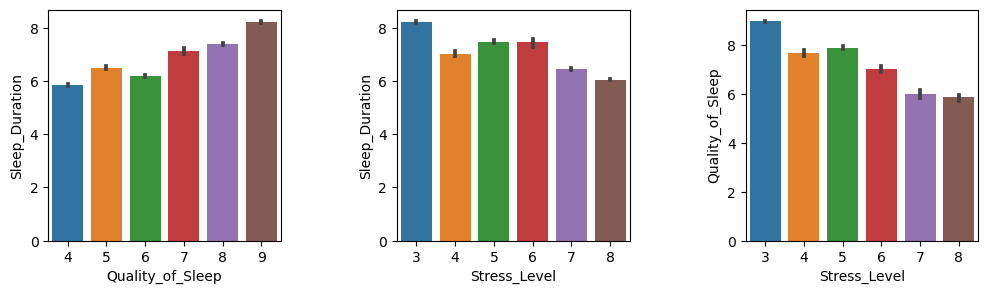

In [198]:
fig, ax = plt.subplots(1,3, figsize = (12,3))
plt.subplots_adjust(wspace = 0.5)

sns.barplot(data=sleep_df, x ='Quality_of_Sleep',y = 'Sleep_Duration', ax = ax[0])
sns.barplot(data=sleep_df, x ='Stress_Level',y = 'Sleep_Duration', ax = ax[1])
sns.barplot(data=sleep_df, x ='Stress_Level',y = 'Quality_of_Sleep', ax = ax[2])


